<a href="https://colab.research.google.com/github/Jacobmunoz88/se-ales-y-sistemas/blob/main/Copia_de_S_estandar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Señales Estándar

- Ciertas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) (funciones) juegan un papel importante en la aplicación teórica y práctica del [procesamiento de señales](https://en.wikipedia.org/wiki/Signal_processing).

- Surgen de la teoría de señales y sistemas, y son usadas para caracterizar las propiedades de los sistemas lineales e invarientes con el tiempo (SLIT) y ocurren frecuentemente en aplicaciones prácticas.

- Estas señales estándar (prototipo) son introducidas e ilustradas a continuación.

- Se limitan a señales determinísticas de una dimensión y a señales de amplitud continua.

- Se realizarán simulaciones utilizando la librería [sympy](https://www.sympy.org/es/).

### Señal exponencial compleja

La señal exponencial compleja está definida desde la [función exponencial](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane):

\begin{equation}
x(t) = e^{s t}
\end{equation}

donde $s = \sigma + j \omega$ denota la frecuencia compleja con $\sigma, \omega \in \mathbb{R}$.

La señal es usada a menudo como una representación general de señales. Usando [la fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula), la función se puede reformular como:

\begin{equation}
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}

La parte real/imaginaria de la señal exponencial está dada por un coseno/seno con frecuencia angular $\omega = 2 \pi f$.

Para $t>0$, el peso dependiente del tiempo $e^{\sigma t}$ es:

* exponencial decreciente con el tiempo para $\sigma < 0$,
* constante uno para $\sigma = 0$,
* exponencial creciente con el tiempo para $\sigma > 0$.

Además, la señal exponencial compleja es usada para modelar señales armónicas.

**Ejemplo**

El ejemplo ilustra la señal exponencial compleja y sus parámetros. El módulo de Python [SymPy](http://docs.sympy.org/latest/index.html) es usado para este propósito. Este proporciona funcionalidad para las variables y funciones simbólicas, así como su cálculo. Las variables simbólicas requeridas deben definirse explícitamente antes de su uso. En este ejemplo, $t$, $\omega$ y $\sigma$ son defnidos como variables simbólicas reales, seguido por la definición de la propia señal exponencial.

In [1]:
%matplotlib inline
# para graficar en el entorno
import sympy as sym #importa la librería sympy
sym.init_printing() #se inicializa para mostrar en pantalla

t, sigma, omega = sym.symbols('t sigma omega', real=True)#definir variables simbólicas
s = sigma + 1j*omega  #sobre carga operador para definir parte imaginaria
x = sym.exp(s*t)#función exponencial simbólica desde sympy
x

 t⋅(1.0⋅ⅈ⋅ω + σ)
ℯ               

Ahora, tomando los valores específicos para la frecuencia compleja $s = \sigma + j \omega$, con fines ilustrativos, una nueva señal es definida mediante la sustitución de $\sigma$ y $\omega$. La parte real e imaginaria de la señal es graficada.

x(t)= exp(t*(1.0*I*omega + sigma))


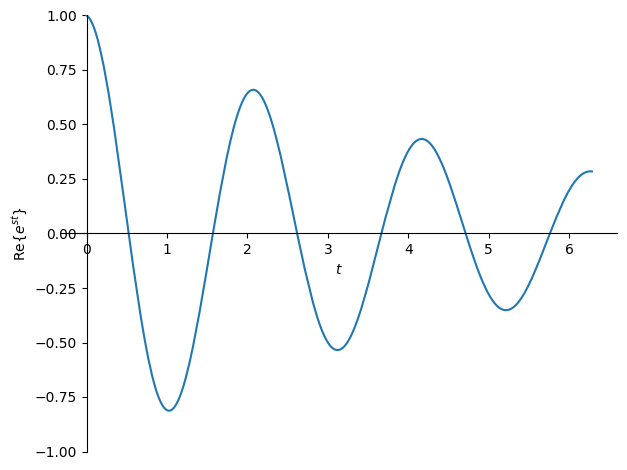

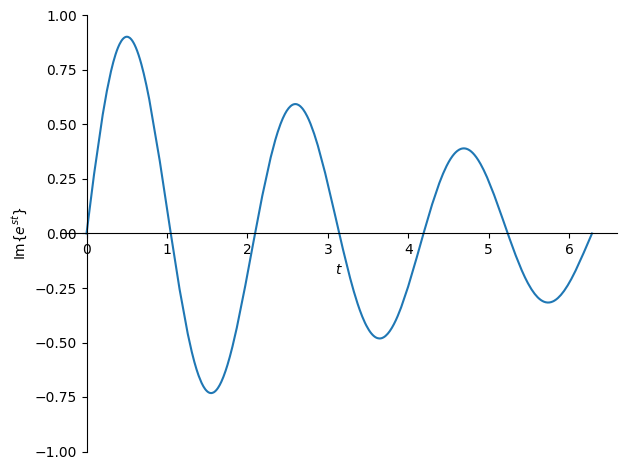

In [2]:
y = x.subs({omega: 3, sigma : -0.2}) #sustituir variables omega y sigma por valores numéricos
print(r'x(t)=',x)
#se gráfica desde el paquete plot de sympy por ser objetos de variable simbólica
sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1])

**Ejercicio**

* Pruebe otros valores de `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.  

x(t)= exp(t*(1.0*I*omega + sigma))


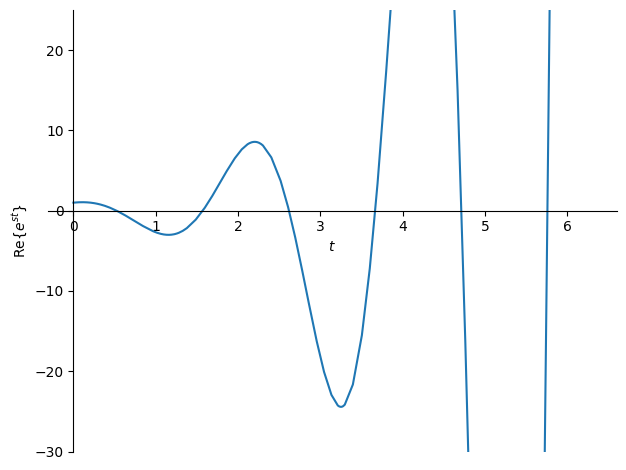

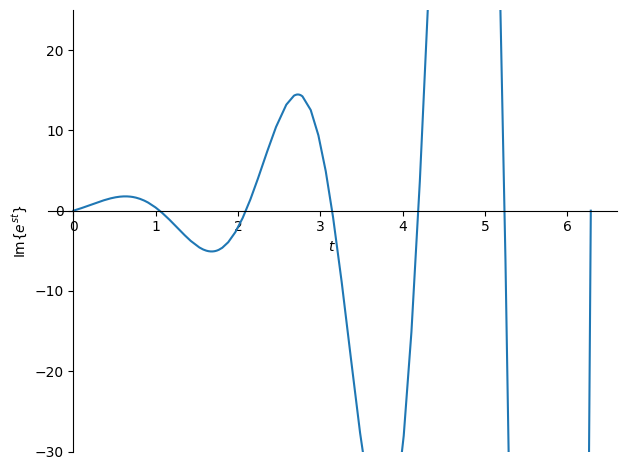

In [4]:
#ejemplo creciente -> sigma > 0
y = x.subs({omega: 3, sigma : 1})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-30,25]) #r' indica al linterprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-30,25]);

x(t)= exp(t*(1.0*I*omega + sigma))


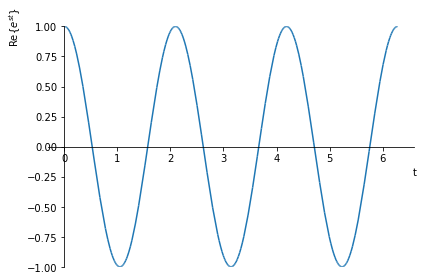

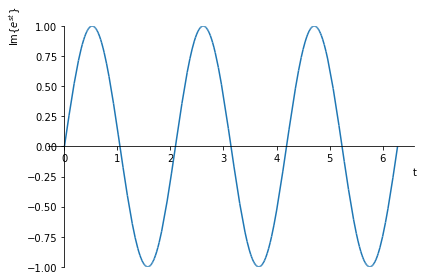

In [ ]:
#ejemplo constante sigma = 0
y = x.subs({omega: 3, sigma : 0})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1]) #r' indica al interprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1]);

x(t)= exp(t*(1.0*I*omega + sigma))


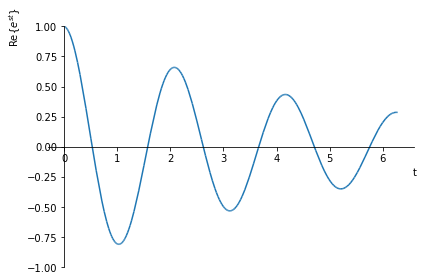

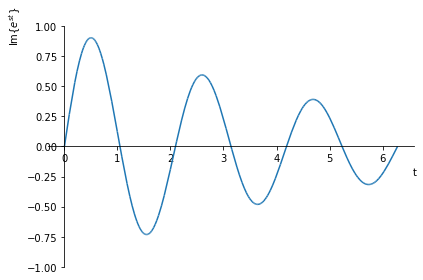

In [ ]:
#ejemplo decreciente sigma < 0
y = x.subs({omega: 3, sigma : -0.2})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1]) #r' indica al interprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1]);

**Nota**: las soluciones de los ejercicios deben estar acompañadas por su respectiva discusión en celda tipo texto, algo como:

- Como se aprecia para la simulación con ...

### Impulso de Dirac - Función delta $\delta(t)$

El impulso de Dirac es una de las más importantes señales en la teoría de señales y sistemas. Es usada para la caracterización de SLIT y el modelado de señales similares a impulsos.

El impulso de Dirac es definido de la forma [Función delta de Dirac](https://en.wikipedia.org/wiki/Dirac_delta_function) la cual no es una función en el sentido convencional. Es una función generalizada o *distribución*.

El impulso de Dirac es denotado como $\delta(t)$. La función delta de Dirac se define por su efecto en otras funciones. Afortunadamente para su aplicación en el procesamiento de señales, es adecuado considerar solo ciertas propiedades. Las más relevantes son:

- **Propiedad de selectividad**

    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    
donde $x(t)$ necesita ser diferenciable en $t=0$. La propiedad de selectividad implica $\int_{-\infty}^{\infty} \delta(t) = 1$.

- **Multiplicación**

    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    
donde $x(t)$ necesita ser diferenciable en $t=0$.
    
-  **Linealidad**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
- **Escamalmiento**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}

donde $a \in \mathbb{R} \setminus 0$ (sin incluir el 0). Esto implica que el impulso de Dirac es una función con simetría uniforme.
    
- **Derivación**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

Es importante notar que el producto $\delta(t) \cdot \delta(t)$ de dos impulsos de Dirac no está definido.

**Ejemplo**

Este ejemplo ilustra alguanas propiedades básicas del impulso de Dirac. Primero definamos un impulso de Dirac:

In [5]:
delta = sym.DiracDelta(t)#función dirac en sympy
delta

δ(t)

Ahora probemos la propiedad de selectividad definiendo una señal arbitraria (función) $f(t)$ e integrando su producto con el impulso Delta

In [7]:
f = sym.Function('f')(t) # f(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo)) # integral con limites desde -inf hasta +inf


f(0)

In [ ]:
f

**Ejercicio**

* Compruebe la propiedad de selectividad, para un impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior.

In [8]:
#f(t-\tau)
#definir tau
tau = sym.symbols('tau', real=True)
g = sym.Function('g')(t) # g(t)
delta_T = sym.DiracDelta(t-tau) # delta(t-tau)
delta_T
sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))


g(τ)

### Señal Heaviside - Función escalón

La función escalón o [Heaviside](https://en.wikipedia.org/wiki/Heaviside_step_function) se define como:

\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
\end{equation}

Algunas definiciones alternativas existen con respecto al valor de $\epsilon(t)$ en $t=0$. La función Heaviside se usa para representar un cambio en un punto específico del tiempo y se mantiene encendido de forma indefinida.

El escalón y el delta se relacionan mediante la siguiente expresión:

\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = \epsilon(t)
\end{equation}

**Ejemplo**

A continuación, una señal Heaviside $\epsilon(t)$ se define y grafica. Note que `Sympy` denota la función Heaviside como $\theta(t)$.

In [22]:
step = sym.Heaviside(t)#función escalón en sympy
step

θ(t)

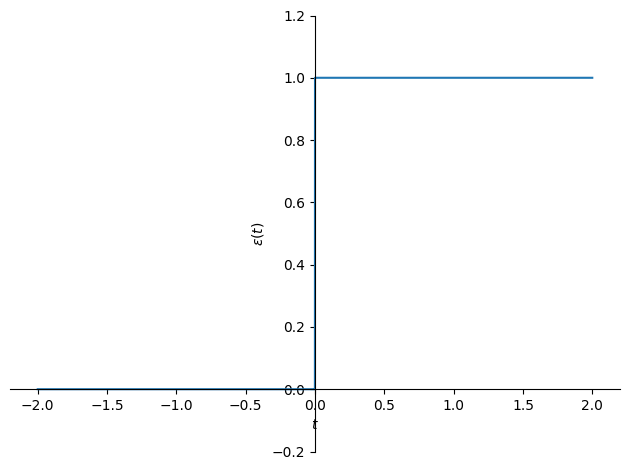

In [23]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

Ahora se construye un armónico (señal coseno o seno) $\cos(\omega t)$ con $\omega=2$, el cual se enciende en $t=0$:

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

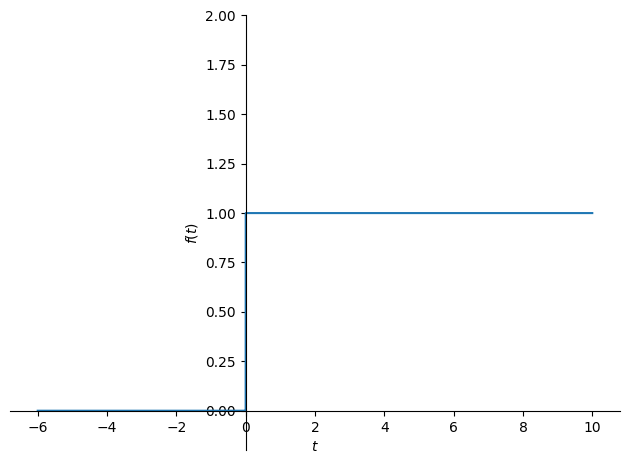

In [24]:
g=sym.Heaviside(t)
sym.plot(g, (t,-6,10), ylim= [-0.2,2])

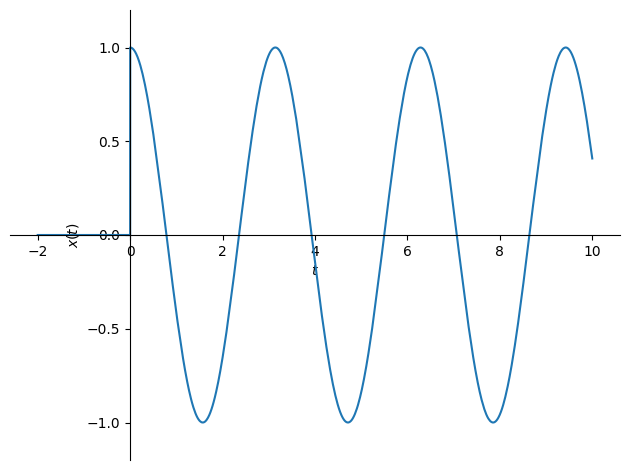

In [25]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega,2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Señal pulso rectangular

La función [pulso rectangular](https://en.wikipedia.org/wiki/Rectangular_function) se define como:

\begin{equation}
\text{rect}(t) = \begin{cases} 1 & |t| < \frac{1}{2} \\ \frac{1}{2} & |t| = \frac{1}{2} \\ 1 & |t| > \frac{1}{2} \end{cases}
\end{equation}

Algunas definiciones alternativas existen difiriendo del valor de $\text{rect}(t)$ para $t = \pm \frac{1}{2}$. La señal pulso rectangular se utiliza para representar un encendido por un intervalo limitado de tiempo o de duración finita, y se relaciona con la función Heaviside asi:

\begin{equation}
\text{rect}(t) = \epsilon \left(t + \frac{1}{2} \right) - \epsilon \left(t - \frac{1}{2} \right)
\end{equation}

**Ejemplo**

A continuación se define la función pulso rectangular desde el escalón en `Sympy`:

In [26]:
class rect(sym.Function): #clase/objeto tipo sympy

    @classmethod #decorador objeto
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

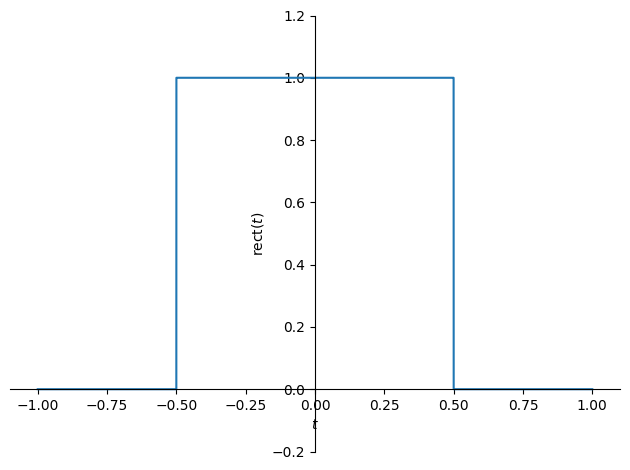

In [27]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

**Ejercicio**

* Use la función $\text{rect}(t)$ para construir una función $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$.

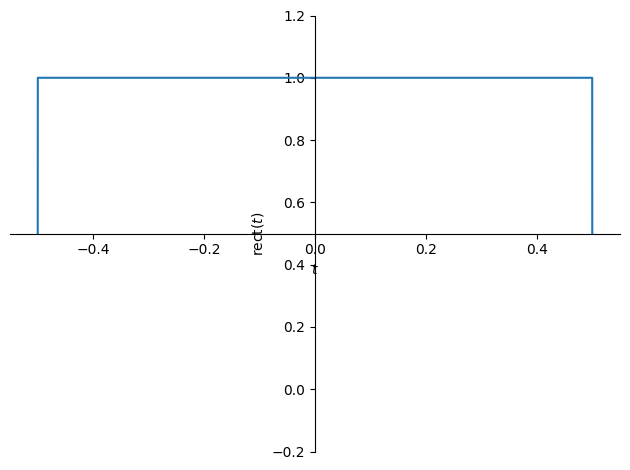

In [28]:
sym.plot(rect(t), (t, -1/2, 1/2), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$')

### Función signo

La función [signo/signum function](https://en.wikipedia.org/wiki/Sign_function) evalua el signo de su argumento:

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

La señal sign es útil para representar el valor absoluto de una señal real $x(t) \in \mathbb{R}$ como:

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

y se relaciona con la señal Heaviside como:

\begin{equation}
\text{sgn}(t) = 2 \cdot \epsilon(t) - 1
\end{equation}

**Ejemplo**

El siguiente ejemplo ilustra la función $\text{sgn}(t)$. Note que la función sign se representa como $\text{sign}(t)$ en `Sympy`.

In [ ]:
sgn = sym.sign(t)
sgn

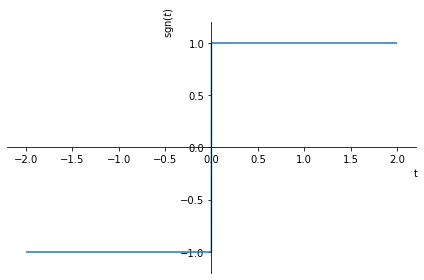

In [ ]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

**Ejercicio**

Genere un [rectificador de onda completa](https://en.wikipedia.org/wiki/Rectifier#Full-wave_rectification) utilizando la función $\text{sgn}(t)$

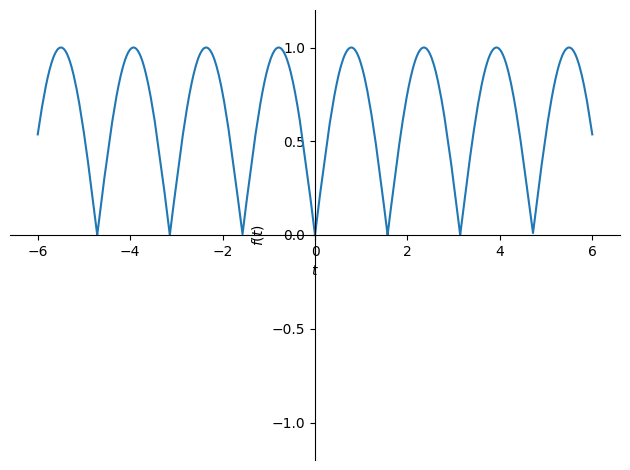

In [20]:
y= abs(sym.sign(t) * sym.sin(omega*t))
sym.plot(y.subs(omega,2), (t,-6,6), ylim=[-1.2,1.2])

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.